# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: Andrea Cosentino

Student 2: Andrei Aralov

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [ ]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [ ]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [ ]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [ ]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [ ]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [ ]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [ ]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [ ]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [ ]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [ ]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('image.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

In [ ]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

0 253 uint8


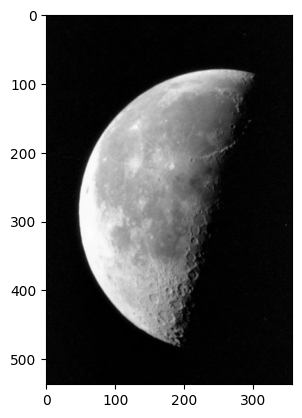

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))


def showImage(img):
    plt.imshow(img, cmap='grey', vmin=0, vmax=255)
    plt.show()

img = openImage('img/moon.png')
print(img.min(),img.max(), img.dtype)
showImage(img)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [15]:
def countPixels(I,k):
    """ Array*int -> int"""
    r = 0
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i,j] == k:
                r += 1       
    return r

test = np.ones((10, 5))
test[3, 3] = 10
test[2, 3] = 10
count1 = countPixels(test, 1)
count10 = countPixels(test, 10)
print(f'There are {count1} pixels equal to 1 in \n{test}')
print(f'There are {count10} pixels equal to 10 in \n{test}')

There are 48 pixels equal to 1 in [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
There are 2 pixels equal to 10 in [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1. 10.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [38]:
def replacePixels(I, k1, k2):
    """ Array*int*int -> Array """
    ret = np.copy(I)
    ret[ret == k1] = k2
    return ret

print('Test for the moon')
print(countPixels(img, 3))
print(countPixels(img, 4))
A = replacePixels(img, 3, 4)
print(countPixels(A, 4))
print(countPixels(img, 3))
print(countPixels(img, 4))

print(f'If we replace 10s with 5s in test, we get \n{replacePixels(test, 10, 5)}')

Test for the moon
25408
17167
42575
25408
17167
If we replace 10s with 5s in test, we get 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 5. 1.]
 [1. 1. 1. 5. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [34]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    mn, mx = np.min(I), np.max(I)
    ret = np.copy(I).astype(float)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            ret[i, j] = k1 + (k2 - k1) * (ret[i, j] - mn) / (mx - mn)
    return ret.astype(I.dtype)

print(f'If we normalize to [-1, 0.5], we get \n{normalizeImage(test, -1, 0.5)}')

If we normalize to [-1, 0.5], we get 
[[-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.   0.5 -1. ]
 [-1.  -1.  -1.   0.5 -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]]


And for the moon in [0; 127]


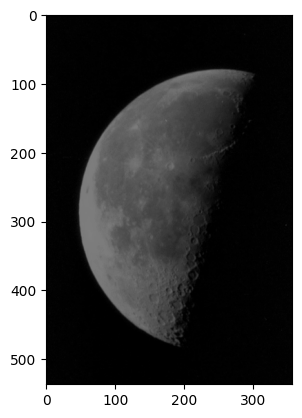

In [35]:
print('And for the moon in [0; 127]')
moon_norm = normalizeImage(img, 0, 127)
showImage(moon_norm)

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

Inverted moon...


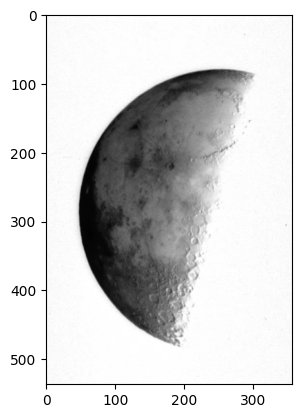

In [36]:
def inverteImage(I):
    """ Array -> Array """
    return 255 - I


print('Inverted moon...')
showImage(inverteImage(img))

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [47]:
def computeHistogram(I):
    """ Array -> Array """
    h = np.zeros(256, dtype=int)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            h[I[i, j]] += 1
    return h

hist = computeHistogram(img)
np_hist = np.histogram(img, bins=256, range=(0, 255))[0]
assert np.all(hist == np_hist)
print('Assertion checks that a histogram from numpy is the same as the manually computed')

# I don't think it is possible. It is possible to mask it with numpy API, for instance using
# h = np.zeros(256, dtype=int)
# for k in range(0, 256):
#   h += np.count_nonzero(a == k)
#
# But the implementation will visit the pixels anyway 

Assertion checks that a histogram from numpy is the same as the manually computed


7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

Thresholded moon


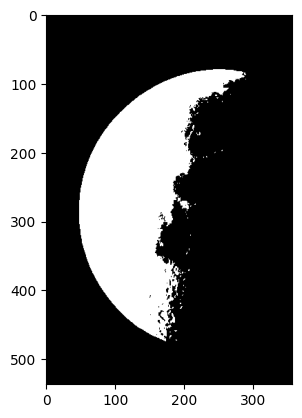

In [48]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    ret = np.copy(I)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            ret[i, j] = 0 if ret[i, j] < s else 255
    return ret

moon_thresh = thresholdImage(img, 127)
print('Thresholded moon')
showImage(moon_thresh)

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

The first histogram is blue, the second one is orange


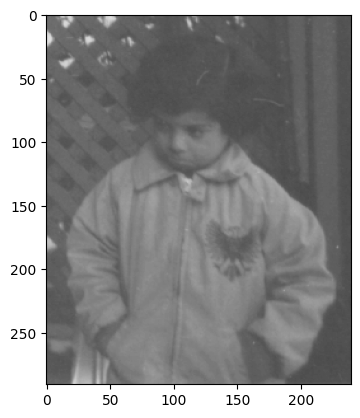

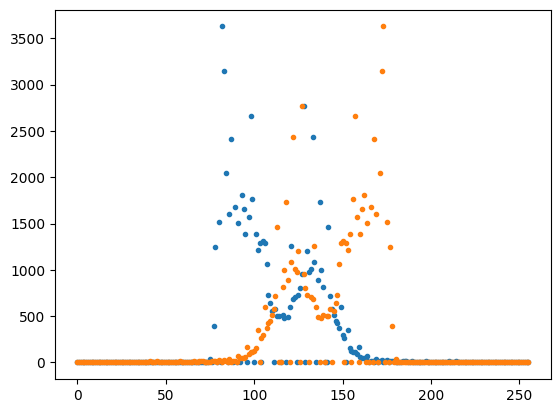

In [59]:
import matplotlib.pyplot as plt

print('The first histogram is blue, the second one is orange')

img = openImage('img/pout.png')
showImage(img)
hist = computeHistogram(img)
plt.plot(hist, '.')

img_inv = inverteImage(img)
hist_inv = computeHistogram(img_inv)
plt.plot(hist_inv, '.')

plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

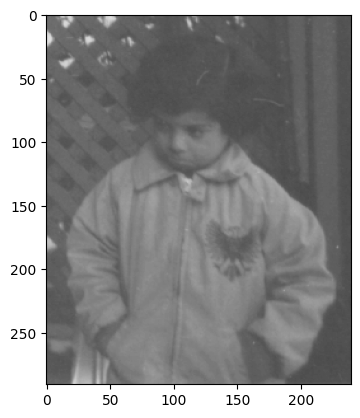

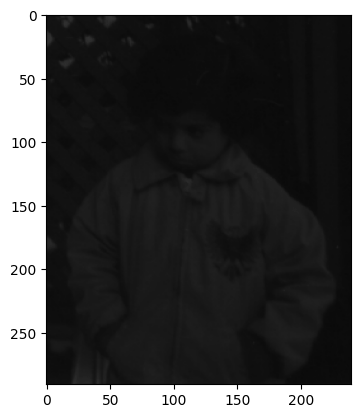

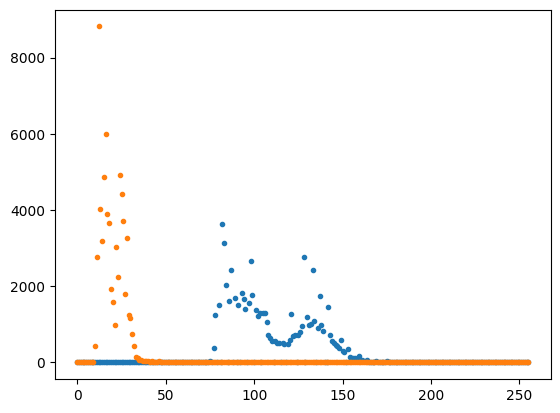

In [88]:
img = openImage('img/pout.png')
showImage(img)
hist = computeHistogram(img)

img_norm = normalizeImage(img, 10, 50)
showImage(img_norm)
hist_norm = computeHistogram(img_norm)

plt.plot(hist, '.')
plt.plot(hist_norm, '.')

plt.show()

# The image becomes worse

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

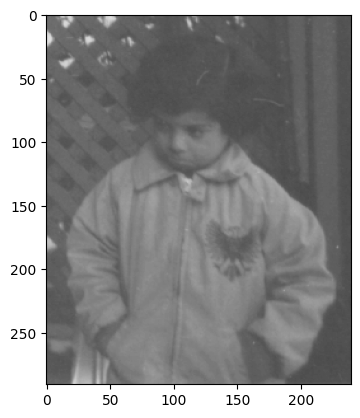

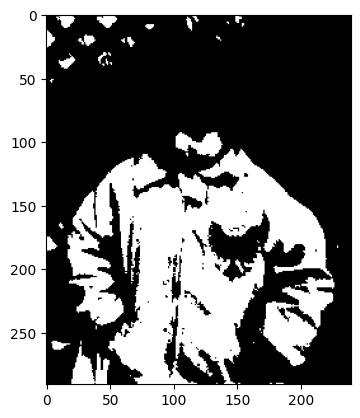

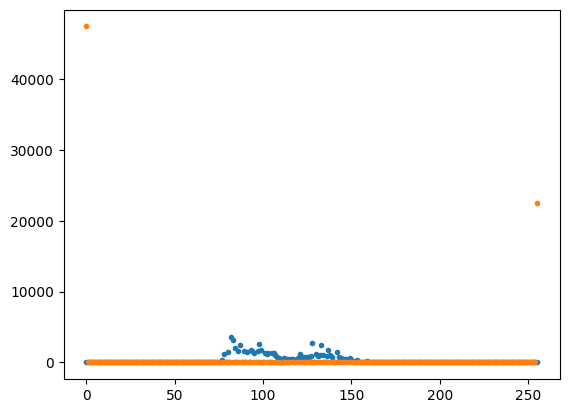

In [62]:
img = openImage('img/pout.png')
showImage(img)
hist = computeHistogram(img)

img_th = thresholdImage(img, 127)
showImage(img_th)
hist_th = computeHistogram(img_th)

plt.plot(hist, '.')
plt.plot(hist_th, '.')

plt.show()

## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 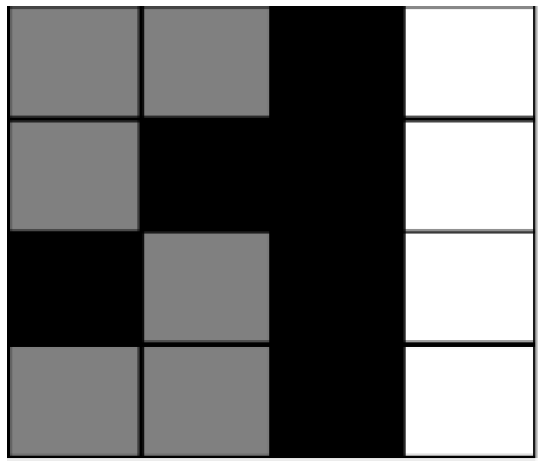 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

In [64]:
I = np.zeros((4, 4))
I[:, 3] = 0

I[0, :2] = 127
I[0, 2] = 255

I[1, 0] = 127
I[1, 1:3] = 255

I[2, 0] = 255
I[2, 1] = 127
I[2, 2] = 255

I[3, :2] = 127
I[3, 2] = 255

print(I)

[[127. 127. 255.   0.]
 [127. 255. 255.   0.]
 [255. 127. 255.   0.]
 [127. 127. 255.   0.]]


2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1[$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

0 255


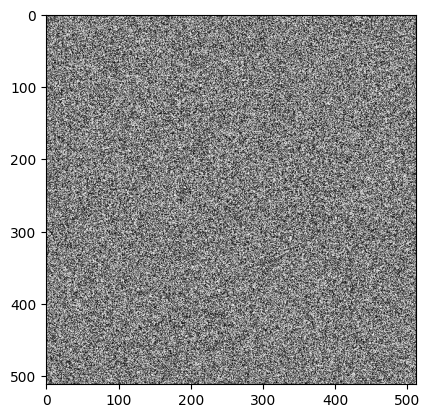

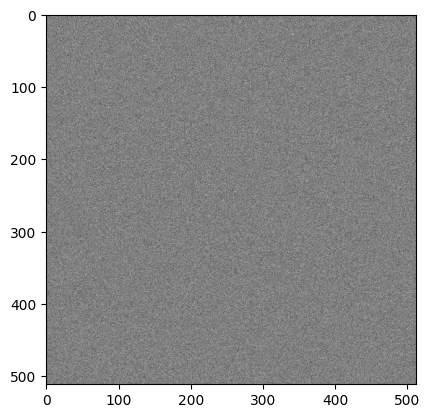

Uniform is blue, normal is orange


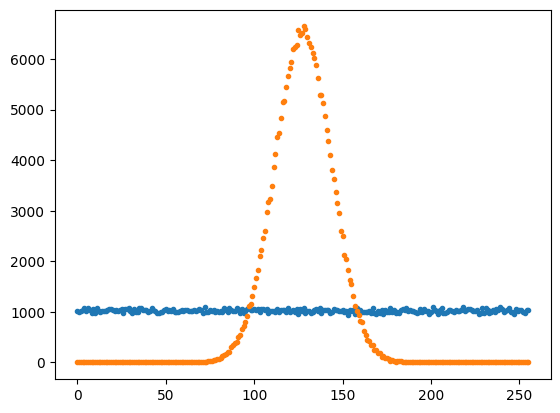

In [70]:
uniform = np.random.randint(256, size=(512, 512))
print(uniform.min(), uniform.max())
showImage(uniform)

normal = ( np.random.randn(512, 512) * 16 + 128 ).astype(np.uint8)
showImage(normal)


print('Uniform is blue, normal is orange')

uniform_hist = computeHistogram(uniform)
plt.plot(uniform_hist, '.')

normal_hist = computeHistogram(normal)
plt.plot(normal_hist, '.')

plt.show()

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

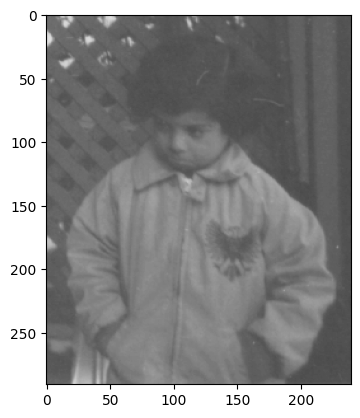

In [82]:
img = openImage('img/pout.png')
showImage(img)

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

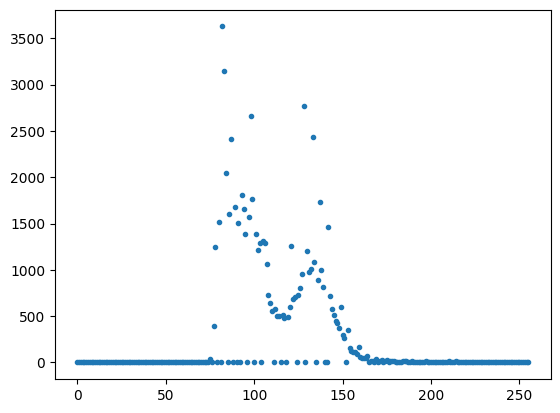

The extrema are 74, 224


In [90]:
hist = computeHistogram(img)
plt.plot(hist, '.')
plt.show()

print(f'The extrema are {np.min(img)}, {np.max(img)}')
# The image has low contrast that can be adjusted

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

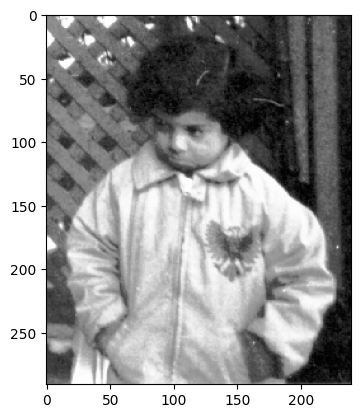

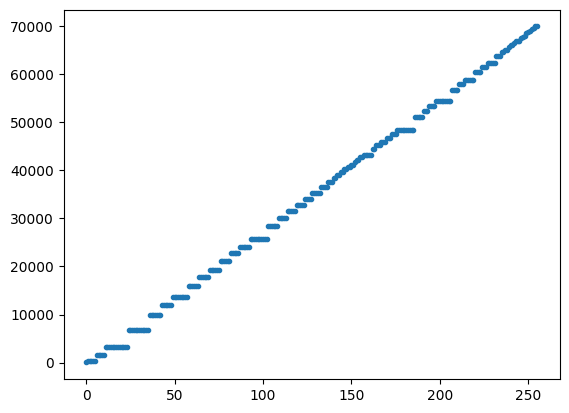

In [87]:
def computeCumulative(h):
    hc = np.zeros_like(h)
    hc[0] = h[0]
    for i in range(1, h.shape[0]):
        hc[i] = hc[i - 1] + h[i]
    return hc    

def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    mn, mx = 0, 255
    ret = np.copy(I)
    hc = computeCumulative(h)
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            ret[i, j] = int((mx - mn) / (I.shape[0] * I.shape[1]) * hc[ret[i, j]])
    return ret

img_eq = histogramEqualization(img, computeHistogram(img))
showImage(img_eq)

hist_eq = computeHistogram(img_eq)

hist_eq_c = computeCumulative(hist_eq)
plt.plot(hist_eq_c, '.')
plt.show()